In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [27]:
from sklearn.datasets import load_svmlight_file

In [28]:
X,y=load_svmlight_file("/home/bo/spark/data/mllib/sample_linear_regression_data.txt")

In [29]:
np.mean(y),np.median(y),np.std(y)

In [30]:
X,y=load_svmlight_file("../scala/field_count_1.txt.libsvm2")

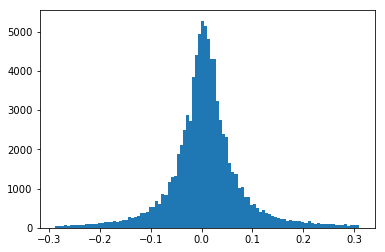

In [79]:
y=pd.read_csv('../input/train_2016.csv',usecols=['logerror']).values[:,0]
plt.hist(y[np.abs(y-y.mean())<0.3],bins=100);
1/np.std(y[np.abs(y)<0.3]),1/np.std(y)

In [80]:
y=y*15

In [81]:
np.mean(np.abs(y)<0.1)

In [82]:
np.mean(y),np.median(y),np.std(y),np.std(y[np.abs(y)<0.5]),y.min(),y.max()

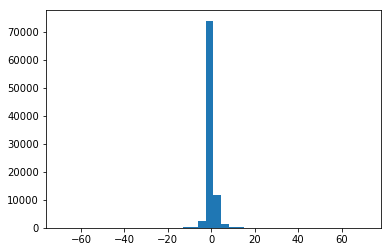

In [83]:
plt.hist(y,bins=40);

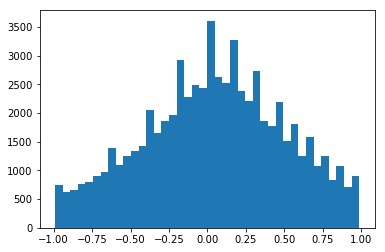

In [85]:
plt.hist(y[np.abs(y)<1],bins=40);

In [8]:
df

0      (0, 0)\t0.455127360066\n  (0, 1)\t0.36644694...
1    [-9.49000987882, 0.257782016358, -4.4388698074...
dtype: object

In [7]:
def f(c):
    x=np.arange(-0.1,0.1,0.001)
    plt.plot(x,np.abs(x))
    plt.plot(x,np.sqrt(x**2+c))
    plt.plot(x,x**2 / np.sqrt(x**2+c))
    plt.show()
    plt.plot(np.diff(np.abs(x))/0.001)
    plt.plot(np.diff(np.sqrt(x**2+c))/0.001)
    plt.plot(np.diff(x**2 / np.sqrt(x**2+c))/0.001)

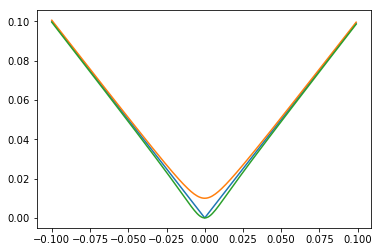

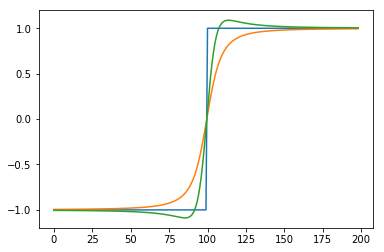

In [8]:
f(0.0001)

In [88]:
from __future__ import division
from sympy import *
init_printing(use_unicode=True)

In [89]:
x, y, z, t = symbols('x y z t')

In [53]:
def g(expr,with_abs=True):
    u=np.arange(-0.5,0.5,0.001)    
    f = lambdify(x, expr, "numpy")
    if with_abs: plt.plot(u,np.abs(u))
    plt.plot(u,f(u))
    plt.show()

    ff = lambdify(x, diff(expr,x,1), "numpy")
    if with_abs: plt.plot(u[1:],np.diff(np.abs(u))/0.001)
    plt.plot(u,ff(u))
    plt.show()
   
    fff = lambdify(x, diff(expr,x,2), "numpy")
    plt.plot(u,fff(u))
    plt.show()

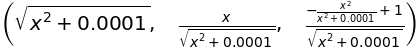

In [42]:
f1= lambda c: sqrt(x**2+c)
f1(0.0001),diff(f1(0.0001)),diff(f1(0.0001),x,2)

In [96]:
c=0.0001
smapef1= 2*sqrt((x-y)**2+c)/ (sqrt(x**2+c)+y)


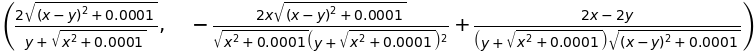

In [97]:
smapef1,(diff(smapef1,x,1))

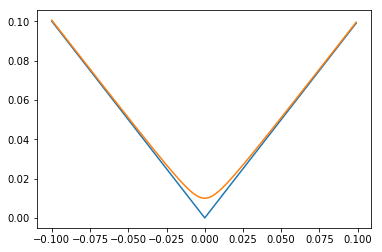

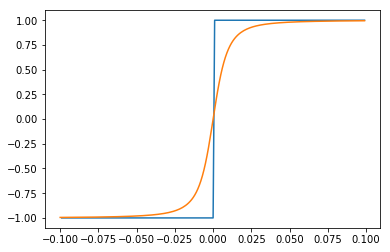

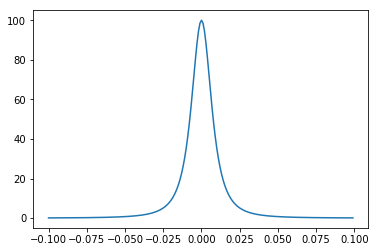

In [51]:
g(f1(0.0001))

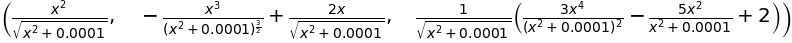

In [44]:
f2= lambda c: x**2 / sqrt(x**2+c)
f2(0.0001),diff(f2(0.0001)),diff(f2(0.0001),x,2)

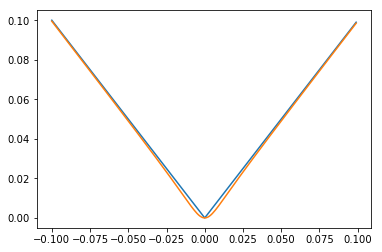

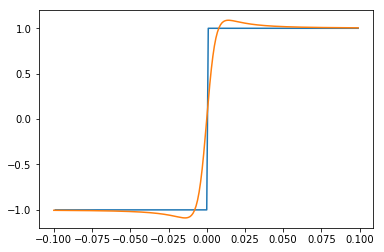

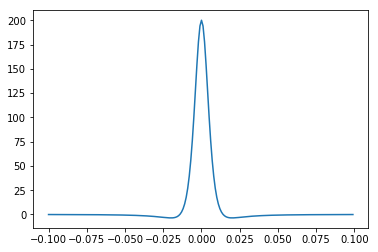

In [45]:
g(f2(0.0001))

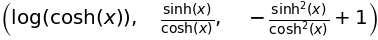

In [54]:
f3=ln(cosh(x))
f3,diff(f3),diff(f3,x,2)

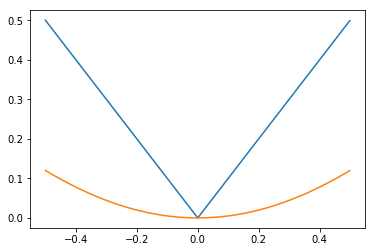

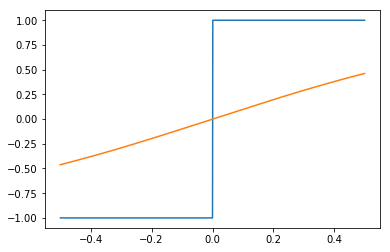

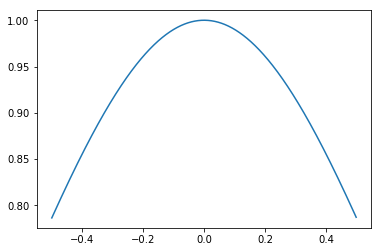

In [55]:
g(f3,with_abs=True)

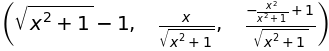

In [79]:
c=1
f4= c*(sqrt(1+(x/c)**2)-1)
f4,diff(f4),diff(f4,x,2)

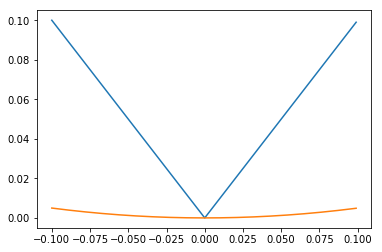

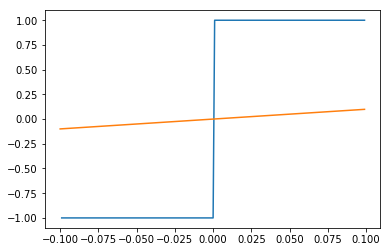

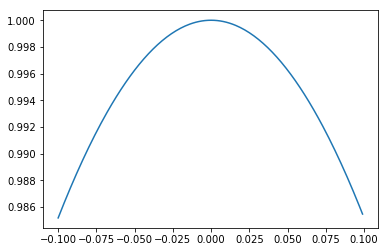

In [80]:
g(f4,with_abs=True)

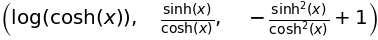

In [65]:
f5=  ln(cosh(x))
f5,diff(f5),diff(f5,x,2)

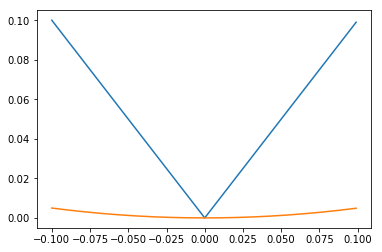

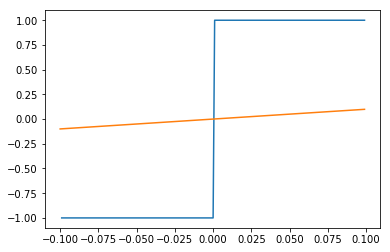

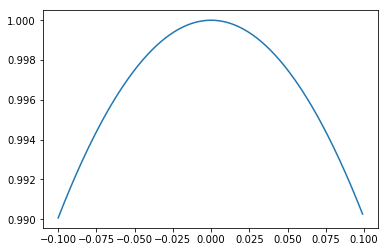

In [66]:
g(f5,with_abs=True)

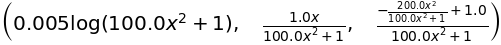

In [68]:
c=0.1
f6= c**2*ln(x**2/c**2+1)/2
f6,diff(f6),diff(f6,x,2)

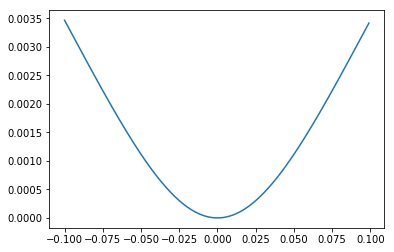

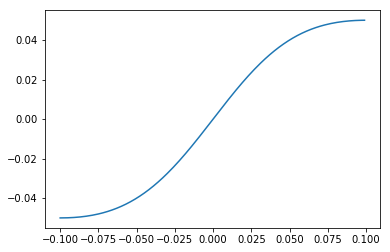

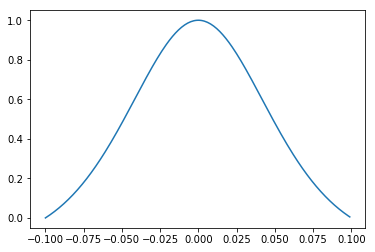

In [70]:
g(f6,with_abs=false)

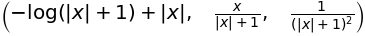

In [174]:
c=1
f7= c**2 * (abs(x)/c-ln(abs(x)/c+1))
ff7=c*x/(abs(x)+c)
fff7=c**2/(abs(x)+c)**2
f7, ff7,fff7

In [175]:
def g2(f,ff,fff,with_abs=True):
    u=np.arange(-0.1,0.1,0.001)    
    f = lambdify(x, f, "numpy")
    if with_abs: plt.plot(u,np.abs(u))
    plt.plot(u,f(u))
    plt.show()

    ff = lambdify(x, ff, "numpy")
    if with_abs: plt.plot(u[1:],np.diff(np.abs(u))/0.001)
    plt.plot(u,ff(u))
    plt.show()
   
    fff = lambdify(x, fff, "numpy")
    plt.plot(u,fff(u))
    plt.show()

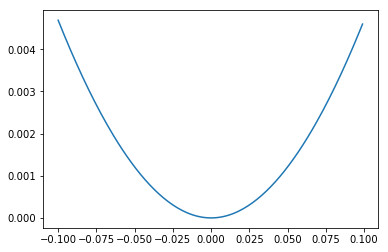

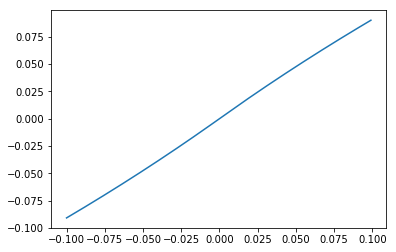

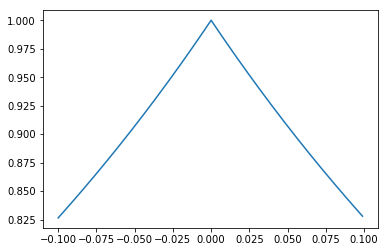

In [176]:
g2(f7,ff7,fff7,False)

In [368]:
def g4(funs):
    u=np.arange(-0.3,0.3,0.01*2)
    from matplotlib import lines
    markers_array=['o','v','s','p','*']
    for i in range(3):
        for j in range(len(funs)):
            f=funs[j]
            f = lambdify(x, f[i], "numpy")
            plt.plot(u,f(u),markers_array[j],alpha=0.5)
        plt.show()

 

In [387]:
c=0.002
f4= c*(sqrt(1+(x/c)**2)-1)

In [382]:
c=1
f5=  ln(cosh(c*x))

In [462]:
c=1
d=3
f7= c * (abs(d*x)/c-ln(abs(d*x)/c+1))
ff7=d**2*x/(abs(d*x)+c)
fff7=c*d**2/(abs(d*x)+c)**2

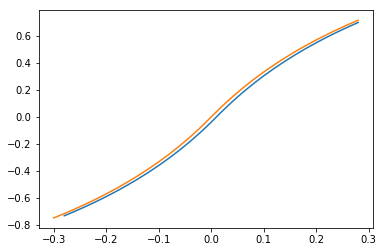

In [461]:
u=np.arange(-0.3,0.3,0.01*2)
f = lambdify(x, f7, "numpy")
fff=lambdify(x, ff7, "numpy")
plt.plot(u[1:],np.diff(f(u),1)/0.02**1)
plt.plot(u ,fff(u))

In [476]:
funs=[[f,diff(f,x,1),diff(f,x,2)] for f in [f4,f5]] +[[f7,ff7,fff7]]

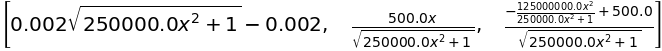

In [477]:
funs[0]

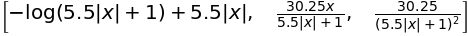

In [478]:
funs[-1]

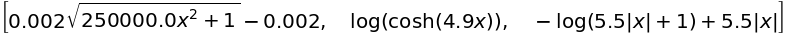

In [479]:
[u[0] for u in funs]

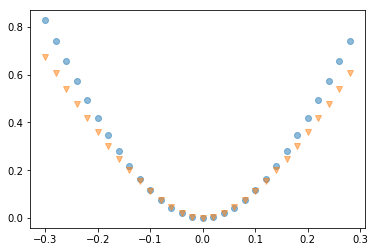

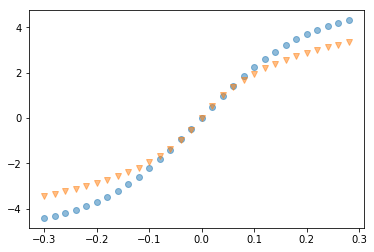

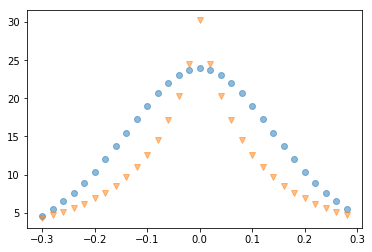

In [488]:
g4(funs[1:])

[0.002*sqrt(250000.0*x**2 + 1) - 0.002, 500.0*x/sqrt(250000.0*x**2 + 1), (-125000000.0*x**2/(250000.0*x**2 + 1) + 500.0)/sqrt(250000.0*x**2 + 1)]


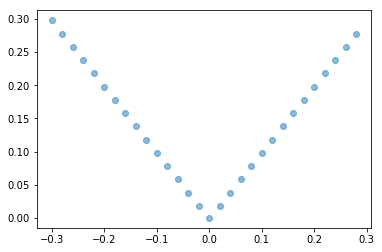

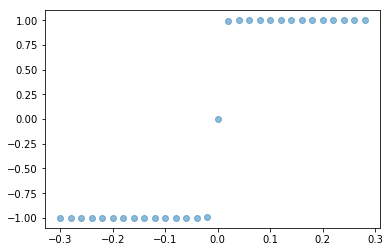

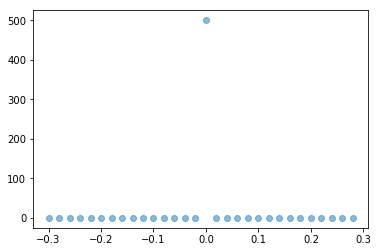

[log(cosh(x)), sinh(x)/cosh(x), -sinh(x)**2/cosh(x)**2 + 1]


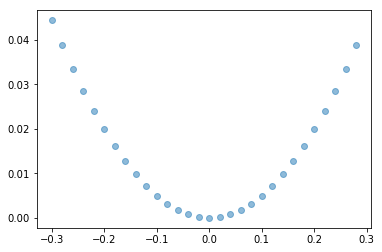

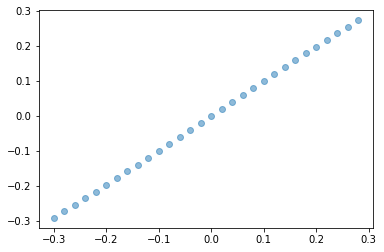

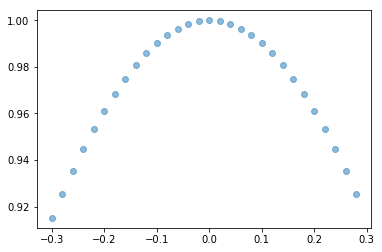

[-log(Abs(x) + 1) + Abs(x), x/(Abs(x) + 1), (Abs(x) + 1)**(-2)]


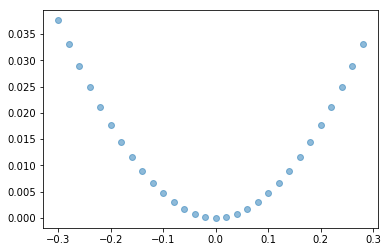

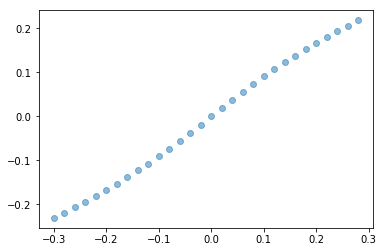

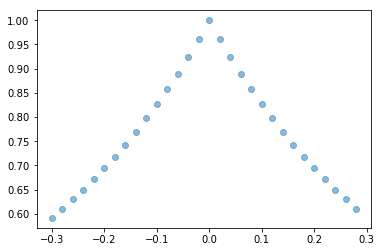

In [392]:
for f in funs:
    print f
    g4([f])

In [179]:
import util
reload(util)

<module 'util' from 'util.pyc'>

In [180]:
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')
train=pd.read_csv('../input/train_2016.csv', parse_dates=['transactiondate'], date_parser=dateparse)

-4.605 4.737 0.005 0.0108164715728 1317 1.6487212707


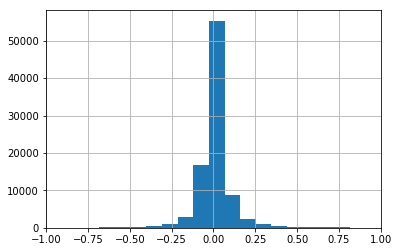

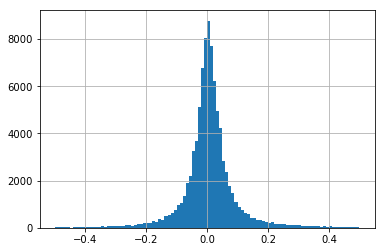

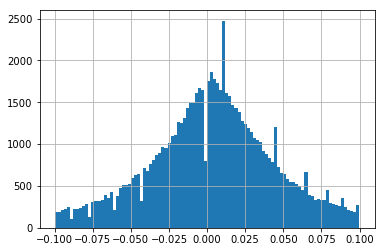

In [181]:
a=train.logerror
print a.min(),a.max(),a.median(),a.mean(), (np.abs(a)>0.5).sum(),np.exp(0.5)
a.hist(bins=100);xlim(-1,1);plt.show()
a[np.abs(a)<0.5].hist(bins=100);plt.show()
a[np.abs(a)<0.1].hist(bins=100);plt.show()

In [207]:
np.abs(a-a.median()).mean(), np.sign(a-a.median()).mean()

In [202]:
np.sqrt(((a-a.median())**2).mean())

In [219]:
c=1.6
f3=ln(exp(-c*x) + exp(c*x))-np.log(2)
f = lambdify(x, f3, "numpy")
ff=lambdify(x,diff(f3,x,1), "numpy")
fff=lambdify(x,diff(f3,x,2), "numpy")
f(a-a.median()).mean(), ff(a-a.median()).mean(), fff(a-a.median()).mean()

In [225]:
c=0.2
f4= c*(sqrt(1+(x/c)**2)-1)
f = lambdify(x, f4, "numpy")
ff=lambdify(x,diff(f4,x,1), "numpy")
fff=lambdify(x,diff(f4,x,2), "numpy")
f(a-a.median()).mean(), ff(a-a.median()).mean(), fff(a-a.median()).mean()

In [230]:
c=1.6
f5=  ln(cosh(c*x))
f = lambdify(x, f5, "numpy")
ff=lambdify(x,diff(f5,x,1), "numpy")
fff=lambdify(x,diff(f5,x,2), "numpy")
f(a-a.median()).mean(), ff(a-a.median()).mean(), fff(a-a.median()).mean()


In [240]:
c=1
f7= c**2 * (abs(x)/c-ln(abs(x)/c+1))
ff7=c*x/(abs(x)+c)
fff7=c**2/(abs(x)+c)**2
f = lambdify(x, f7, "numpy")
ff=lambdify(x,ff7, "numpy")
fff=lambdify(x,fff7, "numpy")
f(a-a.median()).mean(), ff(a-a.median()).mean(), fff(a-a.median()).mean()

In [247]:
np.random.normal(size=3,scale=0.06)

array([ 0.01218416,  0.15370159,  0.03095518])

In [524]:
b=np.random.normal(size=len(a),scale=0.08)
#b=np.random.standard_t(size=len(a),df=10)/14
aa=0.12
#b=np.random.uniform(size=len(a),high=aa ,low=-aa )

np.abs(b).mean(), np.sign(b).mean()

In [525]:
c=0.002
f4= c*(sqrt(1+(x/c)**2)-1)
f = lambdify(x, f4, "numpy")
ff=lambdify(x,diff(f4,x,1), "numpy")
fff=lambdify(x,diff(f4,x,2), "numpy")
f(b).mean(), ff(b).mean(), fff(b).mean()

In [526]:
c=4.5
f5=  ln(cosh(c*x))
f = lambdify(x, f5, "numpy")
ff=lambdify(x,diff(f5,x,1), "numpy")
fff=lambdify(x,diff(f5,x,2), "numpy")
f(b).mean(), ff(b).mean(), fff(b).mean()

In [519]:
c=1
d=5.5
f7= c**2 * (abs(d*x)/c-ln(abs(d*x)/c+1))
ff7=c*d**2*x/(abs(d*x)+c)
fff7=c**2*d**2/(abs(d*x)+c)**2
f = lambdify(x, f7, "numpy")
ff=lambdify(x,ff7, "numpy")
fff=lambdify(x,fff7, "numpy")
f(b).mean(), ff(b).mean(), fff(b).mean()

In [573]:
h=  (x+y)**2/2
h1=  x**2/2

In [581]:
h= ln(1+exp(-x-y))
h1= ln(1+exp(-x))

In [655]:
c=4.5
h=  ln(cosh(c*(x+y)))
h1=ln(cosh(c*x))

In [656]:

dh= (h-h1-y*diff(h1))*2/y**2

In [624]:
c=1
d=5.5
h= c**2 * (abs(d*(x+y))/c-ln(abs(d*(x+y))/c+1))
h1= c**2 * (abs(d*x)/c-ln(abs(d*x)/c+1))
hh1=c*d**2*x/(abs(d*x)+c)
dh= (h-h1-y*hh1)*2/y**2

In [657]:
diff(11*y-2*ln(5.5*y),y,1)

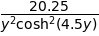

In [658]:
simplify(diff(log(cosh(4.5*y)),y,2)/y**2)

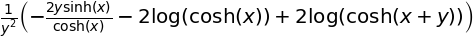

In [659]:
dh

In [660]:
#u=np.arange(-2.3,2.3,0.01*2)
u=np.arange(-.3,.3,0.001)
uu=numpy.transpose([numpy.tile(u, len(u)), numpy.repeat(u, len(u))])

In [661]:
ldh=lambdify([x,y],dh,'numpy')

In [628]:
df= pd.DataFrame([uu[:,0],uu[:,1],ldh(uu[:,0],uu[:,1])]).T

In [629]:
a=df.groupby(1).max()

In [630]:
a[a.index>0].sort_values(2).tail(10)

0             2
1                                
9.000000e-03  0.299  2.967053e+01
8.000000e-03  0.299  2.973387e+01
7.000000e-03  0.299  2.980265e+01
6.000000e-03  0.299  2.986104e+01
5.000000e-03  0.299  2.990889e+01
4.000000e-03  0.299  2.998929e+01
3.000000e-03  0.299  3.005418e+01
2.000000e-03  0.299  3.008454e+01
1.000000e-03  0.299  3.013954e+01
2.775558e-16  0.299  8.113145e+15

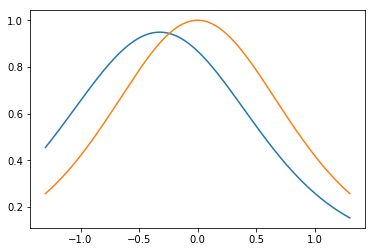

In [663]:
u=np.arange(-1.3,1.3,0.001)
plt.plot(u,ldh(u,1))
plt.plot(u,ldh(u,0.0001))

In [654]:
ldh(u,0.0000001).max()